#### Hello, EveryBody, this is part 1 of beginner series of Pytorch project, hopes it helps beginner to infer how pytorch works.



> **Import the packages**



In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import seaborn as sns
sns.set()
import torch.nn as nn
import torch
import torch.nn.functional as F
import torch.optim as optim

**Load the Dataset**
<br>
we use the boston boston house price dataset in the scikit-learn library

In [2]:
dataset = load_boston()

**Read the dataset as pandas DataFrame**

In [3]:
df=pd.DataFrame(dataset.data)
df.columns=dataset.feature_names
df["Price"]=dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


let's try to check the correlation between "Price" and "RM"

<AxesSubplot:xlabel='RM'>

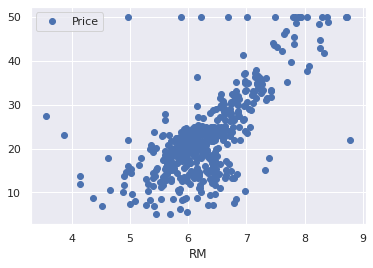

In [4]:
df.plot(x="RM",y="Price",style="o")


split the target variable and test variable

In [5]:
y=df["Price"]
x=df.drop("Price",axis=1)

**Standardize the variable**


In [6]:
#from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
sscaler.fit(x)
X_std= sscaler.transform(x)

**splitting the dataset**

In [7]:
#from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.3,random_state=99)
X_train.shape

(354, 13)

**Define A Neural Network Model by PyTorch**

In [8]:
class NN(nn.Module):
  def __init__(self):
    super(NN,self).__init__()
    self.layer1=nn.Linear(X_train.shape[1],39)
    self.layer2=nn.Linear(39,26)
    self.layer3=nn.Linear(26,13)
    self.layer4=nn.Linear(13,1)
  def forward(self,x):
    x=F.relu(self.layer1(x))
    x=F.relu(self.layer2(x))
    x=F.relu(self.layer3(x))
    x=self.layer4(x)
    return x
model = NN()
print(model)

NN(
  (layer1): Linear(in_features=13, out_features=39, bias=True)
  (layer2): Linear(in_features=39, out_features=26, bias=True)
  (layer3): Linear(in_features=26, out_features=13, bias=True)
  (layer4): Linear(in_features=13, out_features=1, bias=True)
)


**Convert Data into Tensor**

In [9]:
x=torch.tensor(np.array(X_train),dtype=torch.float32,requires_grad=True)
y=torch.tensor(np.array(y_train).reshape(-1,1),dtype=torch.float32)
x

tensor([[-0.3475, -0.4877, -0.4373,  ...,  1.1765,  0.4270, -0.5864],
        [ 0.8214, -0.4877,  1.0160,  ...,  0.8066, -3.4386,  1.5877],
        [ 0.5939, -0.4877,  1.0160,  ...,  0.8066,  0.3871,  0.6261],
        ...,
        [-0.4135, -0.4877, -1.2660,  ..., -0.3031,  0.3337,  0.0697],
        [-0.4130, -0.4877, -0.7553,  ...,  0.3442,  0.4411, -0.4167],
        [-0.3180, -0.4877,  1.5690,  ...,  1.2689,  0.4411,  0.7972]],
       requires_grad=True)

**Define an Optimizer**

In [10]:
#import torch.optim as optim
optimizer= optim.SGD(model.parameters(),lr=0.003)

**Define Loss Function**

In [11]:
loss_fn=nn.MSELoss()

## Train the model <br>
Finally,we can train the model! <br>
At every epoch, we perform:<br>
1. Initialize the gradient of the model parameter
2. Calculate the loss
3. calculate the gradient of the model parameter by backpropagation.
4. Update the model parameter


In [12]:
epochs=200
for i in range(epochs):
  #initialize the model parameter
  optimizer.zero_grad(set_to_none=True)
  #calculate the loss
  output=model(x)
  loss=loss_fn(output,y)
  #backpropagation
  loss.backward()
  #update the parameters
  optimizer.step()
  if(i%5==0):
    print(f"epochs: {i}......loss:{loss}")

epochs: 0......loss:594.1595458984375
epochs: 5......loss:526.6012573242188
epochs: 10......loss:82.33236694335938
epochs: 15......loss:70.07676696777344
epochs: 20......loss:46.26658630371094
epochs: 25......loss:88.09736633300781
epochs: 30......loss:32.294925689697266
epochs: 35......loss:59.15907669067383
epochs: 40......loss:31.184385299682617
epochs: 45......loss:53.36256790161133
epochs: 50......loss:28.19557762145996
epochs: 55......loss:46.25605010986328
epochs: 60......loss:25.833452224731445
epochs: 65......loss:40.3951301574707
epochs: 70......loss:23.79513168334961
epochs: 75......loss:35.542598724365234
epochs: 80......loss:22.029104232788086
epochs: 85......loss:31.800146102905273
epochs: 90......loss:20.516454696655273
epochs: 95......loss:28.681509017944336
epochs: 100......loss:19.212005615234375
epochs: 105......loss:26.077817916870117
epochs: 110......loss:17.9351806640625
epochs: 115......loss:23.592287063598633
epochs: 120......loss:16.800559997558594
epochs: 125.

**The loss would be gradually decreasing.It indicates that the training model is being well done.**

**Validation**

In [13]:
y_train_pred = model(torch.tensor(X_train,dtype=torch.float32,requires_grad=True))
y_test_pred = model(torch.tensor(X_test,dtype=torch.float32))

#convert to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()



**Accuracy: R^2**

In [14]:
test_accuracy=r2_score(y_test,y_test_pred)
train_accuracy=r2_score(y_train,y_train_pred)
print(train_accuracy)
print(test_accuracy)

0.862775777889417
0.7924181816110583


### The score is good, can be improved using hyper-parameter tuning.

# **Visualize the results**
Finally, let's visualize the result by matplotlib.<br>
The red and blue circles shows the results of training and validation data,respectively

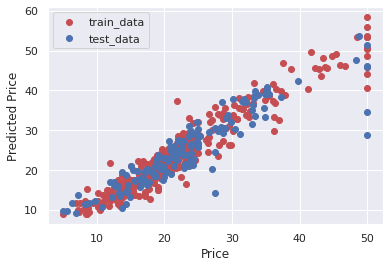

In [15]:
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.scatter(y_train,y_train_pred,color='r',label="train_data")
plt.scatter(y_test,y_test_pred,color='b',label="test_data")
plt.legend()
plt.show()

## Summary
we have seen the Neural Network analysis constructed by PyTorch against the boston house prices dataset.Although we use a very simple network structure,the accuracy of the validation data is more than that of Linear Regression. <br>
**I hopes this notebook helps the readers a little.** <br>



